In [1]:
# default_exp mnist

# Image classification with MNIST
> This page contains various exercises of image classification task with famous MNIST dataset.

In [2]:
from fastai.vision import *

## Data preparation

In [3]:
mnist = untar_data(URLs.MNIST_SAMPLE)

Use data augmentation, but not flipping.

In [4]:
tfms = get_transforms(do_flip=False)

In [5]:
data = (ImageList.from_folder(mnist,convert_mode='L')
    .split_by_folder()
    .label_from_folder()
    .add_test_folder(mnist/'test')
    .transform(tfms, size=28)
    .databunch(bs=128)
    .normalize(imagenet_stats))

In [6]:
data

ImageDataBunch;

Train: LabelList (12396 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/condor/.fastai/data/mnist_sample;

Valid: LabelList (2038 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: CategoryList
7,7,7,7,7
Path: /home/condor/.fastai/data/mnist_sample;

Test: LabelList (6 items)
x: ImageList
Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28),Image (1, 28, 28)
y: EmptyLabelList
,,,,
Path: /home/condor/.fastai/data/mnist_sample

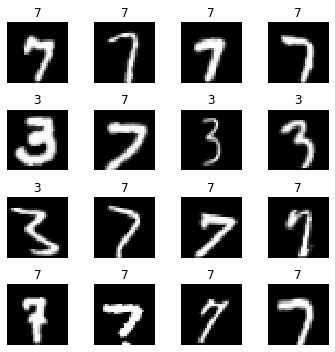

In [7]:
data.show_batch(rows=4,figsize=(5,5))

## Model 1

In [9]:
model = nn.Sequential(
    nn.Flatten(-1),
    nn.Linear(100,50),
    nn.ReLU(),
    nn.Linear(50,10),
    nn.CrossEntropyLoss()
)

In [10]:
model

Sequential(
  (0): Flatten()
  (1): Linear(in_features=100, out_features=50, bias=True)
  (2): ReLU()
  (3): Linear(in_features=50, out_features=10, bias=True)
  (4): CrossEntropyLoss()
)

In [12]:
data.train_dl.

DeviceDataLoader(dl=<torch.utils.data.dataloader.DataLoader object at 0x7f48dd463da0>, device=device(type='cpu'), tfms=[functools.partial(<function _normalize_batch at 0x7f487fd6e6a8>, mean=tensor([0.4850, 0.4560, 0.4060]), std=tensor([0.2290, 0.2240, 0.2250]), do_x=True, do_y=False)], collate_fn=<function data_collate at 0x7f4880b26620>)

In [8]:
#hide
from nbdev.export import *
notebook2script()

Converted 00_core.ipynb.
Converted 01_mnist.ipynb.
Converted 99_index.ipynb.
